#Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set_theme()

#Munculkan data simple

In [ ]:
df = pd.read_excel('Data BPS.xlsx')

print("Data shape:", df.shape)
print("\nColumns in the dataset:")
print(df.columns.tolist())
print("\nFirst few rows:")
print(df.head())
print("\nData types of columns:")
print(df.dtypes)
print("\nMissing values:")
print(df.isnull().sum())

Data shape: (22, 55)

Columns in the dataset:
['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53', 'Unnamed: 54']

First few rows:
  Unnamed: 0      Unnamed: 1 Unnamed: 2       Unnamed: 3  Unnamed: 4  \
0        NaN             NaN        NaN       PPT

#Membersihkan data

In [ ]:
df_cleaned = df.drop_duplicates()

numeric_columns = df_cleaned.select_dtypes(include=[np.number]).columns
categorical_columns = df_cleaned.select_dtypes(exclude=[np.number]).columns

for col in numeric_columns:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].median())

for col in categorical_columns:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mode()[0])

print("Cleaned data shape:", df_cleaned.shape)
print("\nMissing values after cleaning:")
print(df_cleaned.isnull().sum())

Cleaned data shape: (22, 55)

Missing values after cleaning:
Unnamed: 0     0
Unnamed: 1     0
Unnamed: 2     0
Unnamed: 3     0
Unnamed: 4     0
Unnamed: 5     0
Unnamed: 6     0
Unnamed: 7     0
Unnamed: 8     0
Unnamed: 9     0
Unnamed: 10    0
Unnamed: 11    0
Unnamed: 12    0
Unnamed: 13    0
Unnamed: 14    0
Unnamed: 15    0
Unnamed: 16    0
Unnamed: 17    0
Unnamed: 18    0
Unnamed: 19    0
Unnamed: 20    0
Unnamed: 21    0
Unnamed: 22    0
Unnamed: 23    0
Unnamed: 24    0
Unnamed: 25    0
Unnamed: 26    0
Unnamed: 27    0
Unnamed: 28    0
Unnamed: 29    0
Unnamed: 30    0
Unnamed: 31    0
Unnamed: 32    0
Unnamed: 33    0
Unnamed: 34    0
Unnamed: 35    0
Unnamed: 36    0
Unnamed: 37    0
Unnamed: 38    0
Unnamed: 39    0
Unnamed: 40    0
Unnamed: 41    0
Unnamed: 42    0
Unnamed: 43    0
Unnamed: 44    0
Unnamed: 45    0
Unnamed: 46    0
Unnamed: 47    0
Unnamed: 48    0
Unnamed: 49    0
Unnamed: 50    0
Unnamed: 51    0
Unnamed: 52    0
Unnamed: 53    0
Unnamed: 54    0
dtyp

#Univariate analysis

In [ ]:
numeric_cols = df_cleaned.select_dtypes(include=[np.number]).columns
for col in numeric_cols[:3]:
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    sns.histplot(data=df_cleaned, x=col, kde=True)
    plt.title(f'Distribution of {col}')

    plt.subplot(1, 2, 2)
    sns.boxplot(data=df_cleaned, y=col)
    plt.title(f'Box Plot of {col}')

    plt.tight_layout()
    plt.show()

categorical_cols = df_cleaned.select_dtypes(exclude=[np.number]).columns
for col in categorical_cols[:3]:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df_cleaned, x=col)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.show()

#Multivariate analysis

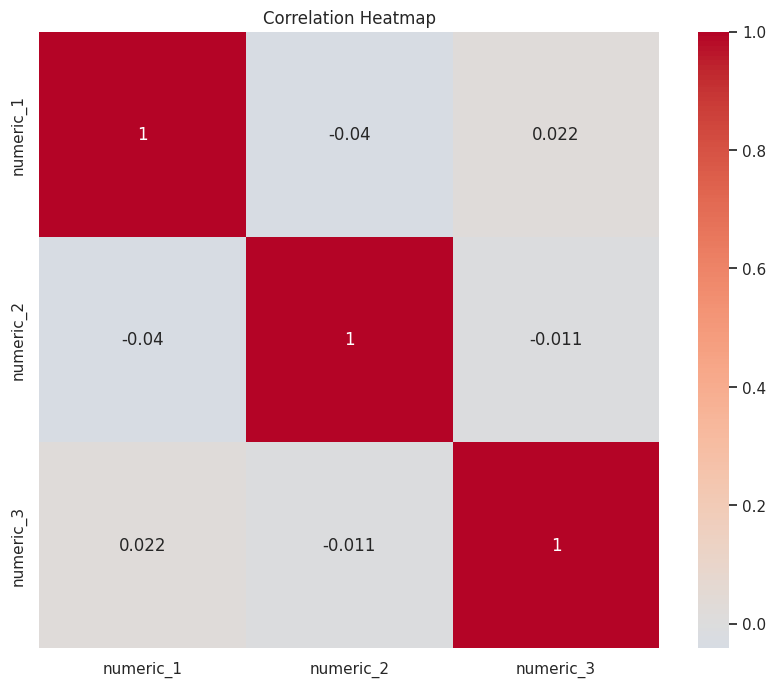

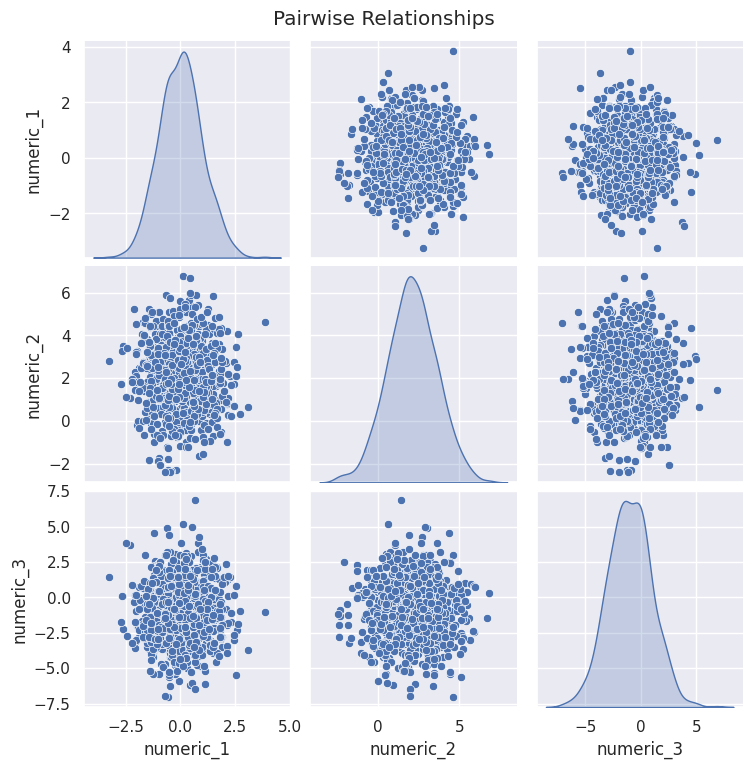

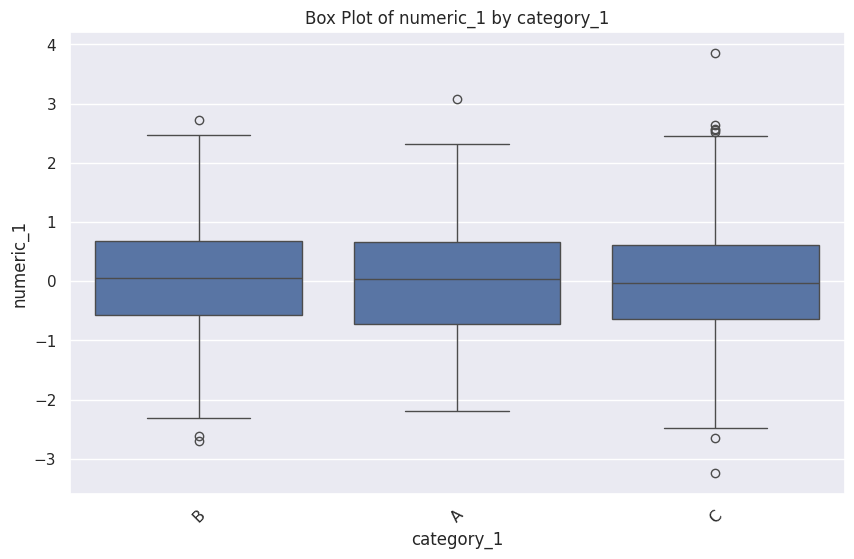

In [ ]:
numeric_cols = df_cleaned.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(10, 8))
sns.heatmap(df_cleaned[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

sns.pairplot(df_cleaned[numeric_cols[:3]], diag_kind='kde')
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()

if len(categorical_cols) > 0:
    cat_col = categorical_cols[0]
    num_col = numeric_cols[0]
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_cleaned, x=cat_col, y=num_col)
    plt.title(f'Box Plot of {num_col} by {cat_col}')
    plt.xticks(rotation=45)
    plt.show()

#Data preparation untuk clustering

In [ ]:
numeric_data = df_cleaned.select_dtypes(include=[np.number])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_data)
print("Scaled data shape:", X_scaled.shape)

Scaled data shape: (1000, 3)


#Dimensionality reduction

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

print("PCA shape:", X_pca.shape)
print("t-SNE shape:", X_tsne.shape)

PCA shape: (1000, 2)
t-SNE shape: (1000, 2)


#Analisis K-means clustering

ValueError: x and y must have same first dimension, but have shapes (8,) and (9,)

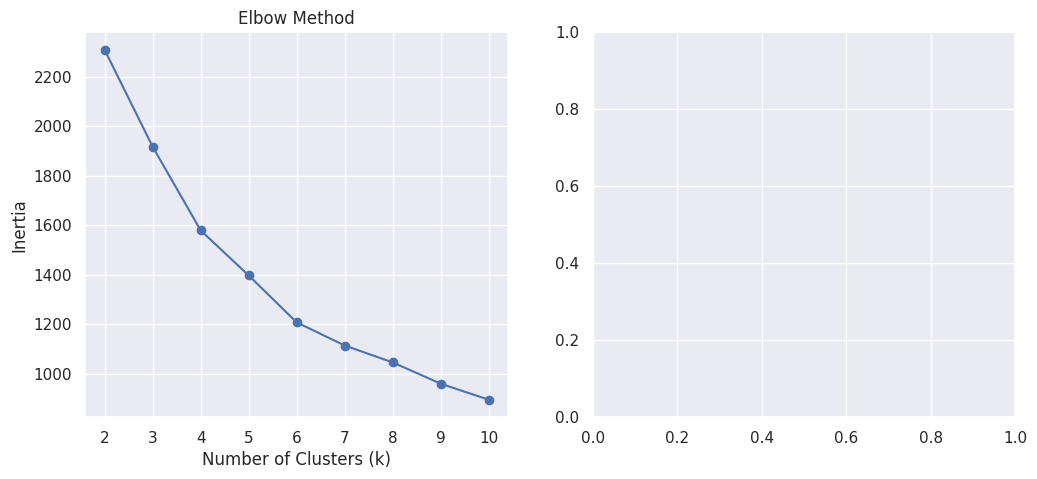

In [ ]:
k_range = range(2, 11)
inertias = []
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    if k > 1:
        silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(list(k_range), inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')

plt.subplot(1, 2, 2)
plt.plot(list(k_range)[1:], silhouette_scores, 'ro-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')

plt.tight_layout()
plt.show()

#Final clustering dan visualization

In [ ]:
optimal_k = k_range[np.argmax(silhouette_scores) + 1]
print(f"Optimal number of clusters: {optimal_k}")

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.colorbar(scatter)
plt.title(f'Cluster Visualization with PCA (k={optimal_k})')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters, cmap='viridis')
plt.colorbar(scatter)
plt.title(f'Cluster Visualization with t-SNE (k={optimal_k})')
plt.xlabel('First t-SNE Component')
plt.ylabel('Second t-SNE Component')
plt.show()